### <center>DAY 5 - IYKRA</center>
<center><font size="5"><strong>Foundation of Statistics</strong></font></center>
<center><font size="4"><strong>An Introduction to Statistics for Data Scientist</strong></font></center>
<hr>
<p style="text-align:center"> **Author**</p>
<center>**Joshua Effendi**</center>
<p style="text-align:center"> **Date:**</p>
<center>**25 October 2019**</center>

<strong>Exercise 2</strong>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import copy

In [2]:
df = pd.read_excel('data loan.xlsx')

In [3]:
df.head()

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
0,1,OTHERS,Karyawan,Jawa,12,>90 - 120 hari,Ya,2.763126,100.00,2.76,...,0.0,2.76,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Ya,3.58,Jasa & Perdagangan
1,2,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,2.805000,103.70,2.71,...,0.0,2.81,Private,Others,Tidak ada,MENIKAH,Laki-laki,Ya,3.58,Others
2,3,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,3.104000,103.33,3.00,...,0.0,3.10,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,4.17,Others
3,4,OTHERS,Karyawan,Jawa,12,0 - 30 hari,Tidak,4.088100,102.51,3.98,...,0.0,4.08,Private,Sarjana,Ada,OTHERS,Laki-laki,Ya,3.61,Jasa & Perdagangan
4,5,OTHERS,Karyawan,Jawa,12,0 - 30 hari,Tidak,4.607100,102.22,4.50,...,0.0,4.60,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,3.30,Jasa & Perdagangan


**Take 80% of Data as Sample**

In [4]:
df_sample = pd.DataFrame.sample(df,frac=0.8).copy().reset_index(drop=True)

In [5]:
df_sample.head()

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
0,27286,OTHERS,Wiraswasta,Jawa,24,0 - 30 hari,Tidak,414.024003,80.47,447.39,...,111.85,360.00,Private,Others,Tidak ada,OTHERS,Laki-laki,Tidak,3.45,Jasa & Perdagangan
1,22872,MINIBUS,Karyawan,Jawa,60,> 150 hari,Ya,274.560003,91.70,206.45,...,41.29,189.32,Private,Others,Tidak ada,MENIKAH,Laki-laki,Tidak,3.33,Others
2,19766,MINIBUS,Karyawan,Jawa,60,> 150 hari,Ya,227.993559,89.33,179.10,...,44.78,160.00,Private,Sarjana,Tidak ada,MENIKAH,Perempuan,Tidak,7.25,Jasa & Perdagangan
3,17491,LCGC,Wiraswasta,Jawa,60,> 150 hari,Ya,207.060000,96.13,132.00,...,26.40,126.89,Private,Others,Ada,OTHERS,Laki-laki,Ya,3.45,Jasa & Perdagangan
4,20564,MINIBUS,Karyawan,Sumatera,60,>90 - 120 hari,Ya,236.999998,85.78,192.20,...,56.25,164.87,Private,Others,Tidak ada,MENIKAH,Laki-laki,Tidak,8.36,Others


In [6]:
q1_income = df_sample['Income'].quantile(0.25)
q3_income = df_sample['Income'].quantile(0.75)
iqr_income = q3_income - q1_income

In [7]:
list_in = df_sample[['Kontrak', 'Income']][(df_sample.Income < (q1_income - 1.5 * iqr_income)) | (df_sample.Income > (q3_income + 1.5 * iqr_income))].index

In [8]:
df_sample_edit = df_sample.drop(list_in, axis=0).copy()

**Do analytical statistic use the method that had been learned**

In [9]:
x = df_sample_edit['Income']
y = df_sample_edit['Inflasi']

In [10]:
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)

In [11]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# regression equation
print('y = %.3f + %.3f X' %(regressor.intercept_, regressor.coef_))

y = 5.226 + 0.020 X


In [13]:
y_pred = regressor.predict(x)
print('R2 = %.3f' %metrics.r2_score(y, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
print('RMSE = %.3f' %rmse)

R2 = 0.007
RMSE = 1.787


Inflasi dan income seseorang tidak memiliki korelasi dan struktur data yang sangat jauh.

**Mengubah Tujuan menjadi numerical**

In [14]:
df_tujuan = pd.get_dummies(df_sample_edit['Tujuan'], prefix = 'Tujuan')

In [15]:
df_tujuan.head()

,Tujuan_Others,Tujuan_Private
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [16]:
df_tujuan_private = df_tujuan.drop(columns='Tujuan_Others')

In [17]:
df_sample_edit = pd.concat([df_sample_edit,df_tujuan_private], axis = 1)

In [18]:
df_sample_edit.head()

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen,Tujuan_Private
0,27286,OTHERS,Wiraswasta,Jawa,24,0 - 30 hari,Tidak,414.024003,80.47,447.39,...,360.00,Private,Others,Tidak ada,OTHERS,Laki-laki,Tidak,3.45,Jasa & Perdagangan,1
1,22872,MINIBUS,Karyawan,Jawa,60,> 150 hari,Ya,274.560003,91.70,206.45,...,189.32,Private,Others,Tidak ada,MENIKAH,Laki-laki,Tidak,3.33,Others,1
2,19766,MINIBUS,Karyawan,Jawa,60,> 150 hari,Ya,227.993559,89.33,179.10,...,160.00,Private,Sarjana,Tidak ada,MENIKAH,Perempuan,Tidak,7.25,Jasa & Perdagangan,1
3,17491,LCGC,Wiraswasta,Jawa,60,> 150 hari,Ya,207.060000,96.13,132.00,...,126.89,Private,Others,Ada,OTHERS,Laki-laki,Ya,3.45,Jasa & Perdagangan,1
4,20564,MINIBUS,Karyawan,Sumatera,60,>90 - 120 hari,Ya,236.999998,85.78,192.20,...,164.87,Private,Others,Tidak ada,MENIKAH,Laki-laki,Tidak,8.36,Others,1


In [19]:
x = df_sample_edit['Total_AR']
y = df_sample_edit['Tujuan_Private']

In [20]:
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)

In [21]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# regression equation
print('y = {} + {} X' .format(regressor.intercept_, regressor.coef_))

y = [ 0.98824894] + [[-0.0004716]] X


In [23]:
y_pred = regressor.predict(x)
print('R2 = %.3f' %metrics.r2_score(y, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
print('RMSE = %.3f' %rmse)

R2 = 0.016
RMSE = 0.312


Tidak ada korelasi pada total AR atau yang dipinjamkan terhadap apa tujuan pinjaman

**Pengaruh Umur terhadap Income**

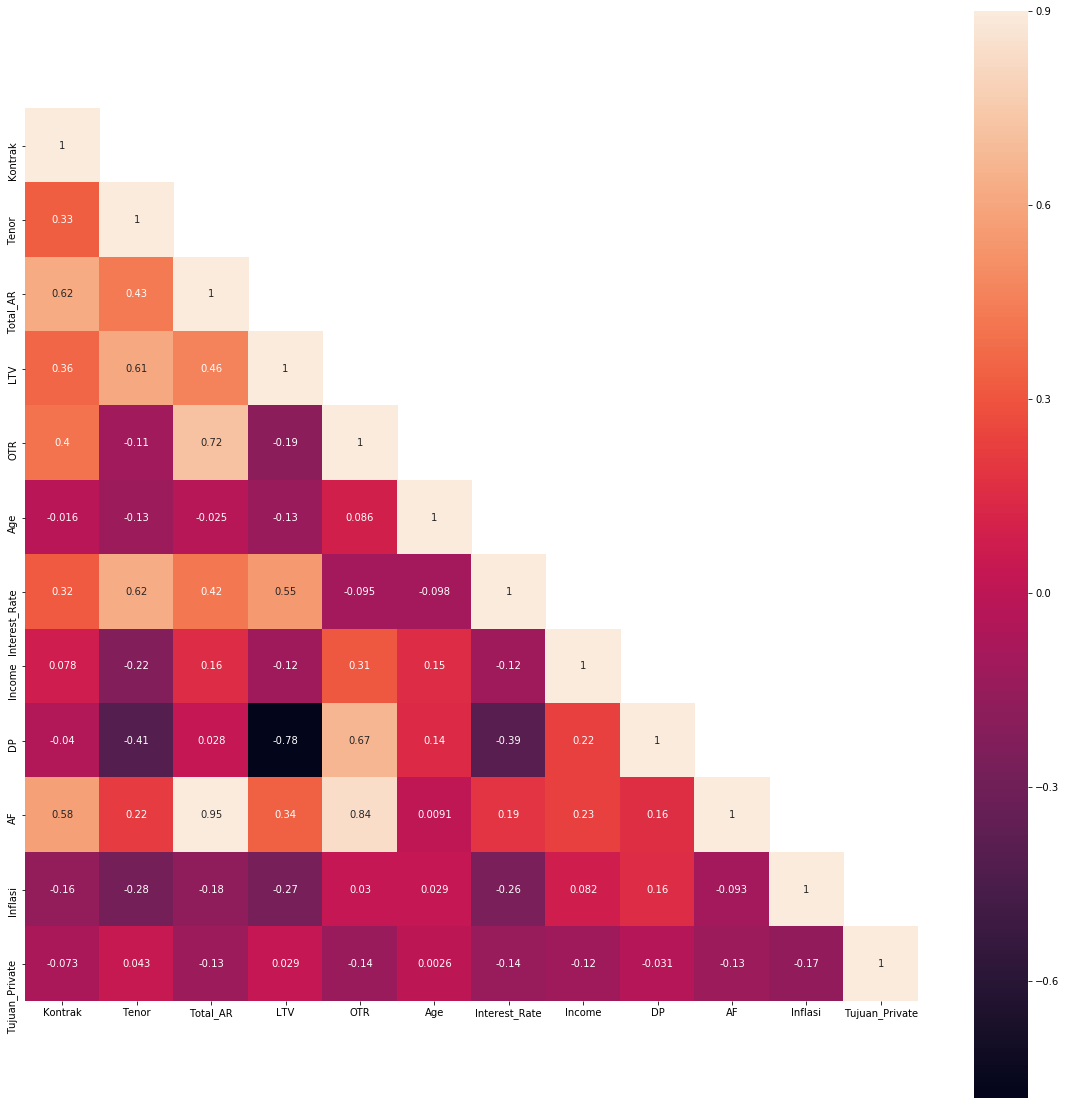

In [24]:
corr = df_sample_edit.corr(method = 'pearson')
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)
plt.show()

As seen from the data income and age doesn't have any correlation. But let's see the function.

In [25]:
x = df_sample_edit['Age']
y = df_sample_edit['Income']

In [26]:
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)

In [27]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# regression equation
print('y = {} + {} X' .format(regressor.intercept_, regressor.coef_))

y = [ 9.34960697] + [[ 0.11912774]] X


In [29]:
y_pred = regressor.predict(x)
print('R2 = %.3f' %metrics.r2_score(y, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
print('RMSE = %.3f' %rmse)

R2 = 0.023
RMSE = 7.349


Terbukti bahwa R2 yang kecil dan RMSE yang besar menandakan bahwa tidak adanya korelasi pada kedua variable

Tetapi pada grafik heatmap Total AR memiliki korelasi yang cukup tinggi dengan AF dan OTR maka kita dapat mencari fungsi.

**Mencari RMSE dari Total AR, AF, dan OTR**

In [30]:
x = df_sample_edit[['AF','OTR']]
y = df_sample_edit['Total_AR']

In [31]:
x = x.to_numpy()
y = y.to_numpy().reshape(-1,1)

In [32]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# regression equation
print('y = {} + {} X' .format(regressor.intercept_, regressor.coef_))

y = [ 6.27183941] + [[ 1.6677809  -0.31020488]] X


In [34]:
y_pred = regressor.predict(x)
print('R2 = %.3f' %metrics.r2_score(y, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
print('RMSE = %.3f' %rmse)

R2 = 0.933
RMSE = 21.775


Terbukti dari R2, bahwa mereka memiliki nilai korelasi yang tinggi dan nilai RMSE yang cukup kecil sehingga dapat disimpulkan bahwa Total_AR dapat dibuat dengan nilai AF dan nilai OTR.